### Plotting review

In this notebook we will do a little review on plotting

In [2]:


import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# configure matplotlib to show plots in the notebook itself
%matplotlib inline 

### Data

In this notebook, we will be using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The data consists of patient records with a number of features, along with a binary label indicating if the patient has diabetes or does not have diabetes. Note that "all patients here are females at least 21 years old of Pima Indian heritage." Note that the `outcome` variable records if a patient does or does not have diabetes.

In [7]:
df = pd.read_csv('diabetes.csv') #Load the dataset
low_dim = df[['Glucose', 'BloodPressure']]
labels = df["Outcome"]

In [8]:
from sklearn.neighbors import KNeighborsClassifier   # import the classifier

knn = KNeighborsClassifier(n_neighbors=2)  # Instantiate the classifier object

knn.fit(low_dim, labels)   # Fit the classifier 

knn.score(low_dim, labels)   # Report the accuracy of the classifier
                             # The accuracy of a classifier is simply what fraction of the data it labels correctly

0.8226857887874837

#### How many objects?

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(low_dim, labels)
knn2.score(low_dim, labels)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(low_dim, labels)
knn3.score(low_dim, labels)

knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(low_dim, labels)
knn4.score(low_dim, labels)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(low_dim, labels)
knn5.score(low_dim, labels)

0.7953063885267275

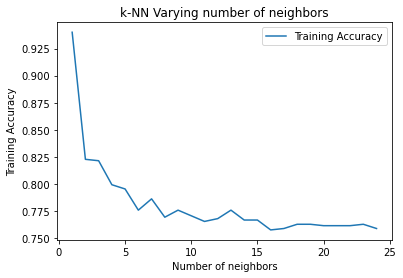

In [14]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,25)
accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    #This is a new instance 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(low_dim, labels)
    
    #Compute accuracy
    accuracy[i] = knn.score(low_dim, labels)
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Training Accuracy')
plt.show()

### Pandas + Altair style!

In [20]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,25)
accuracy = np.empty(len(neighbors))

results = []

for i,k in enumerate(neighbors):
    
    #This is a new instance 
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(low_dim, labels)
    
    #Compute accuracy
    score = knn.score(low_dim, labels)
    
    results.append({"score": score, "K": k})
    
df = pd.DataFrame(results)

import altair as alt 

alt.Chart(df).mark_line().encode(
    x="K",
    y="score"
)

alt.Chart(...)